In [23]:
from PIL import Image
from datasets import load_dataset
from transformers import CLIPProcessor, CLIPModel
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14").cuda()
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")
dataset = load_dataset("danjacobellis/aria_ea_rgb_100k")

Resolving data files:   0%|          | 0/70 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/70 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/83 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/18 [00:00<?, ?it/s]

In [3]:
classes = [
    "kitchen",
    "cooking",
    "food",
    "drink",
    "spill",
    "table",
    "television",
    "phone",
    "laptop",
    "video game",
    "board game",
    "clothes",
    "laundry",
]

In [4]:
def get_clip(sample):
    with torch.no_grad():
        image = sample['image']
        inputs = processor(text=classes, images=image, return_tensors="pt", padding=True)
        for k in inputs.keys():
            if hasattr(inputs[k], "device"):
                inputs[k] = inputs[k].cuda()
        outputs = model(**inputs)
        sample['clip_logit'] = outputs.logits_per_image
        return sample

In [12]:
clip_dataset = dataset['validation'].map(get_clip);

In [17]:
clip_logit = clip_dataset.with_format("torch")['clip_logit']

<BarContainer object of 100 artists>

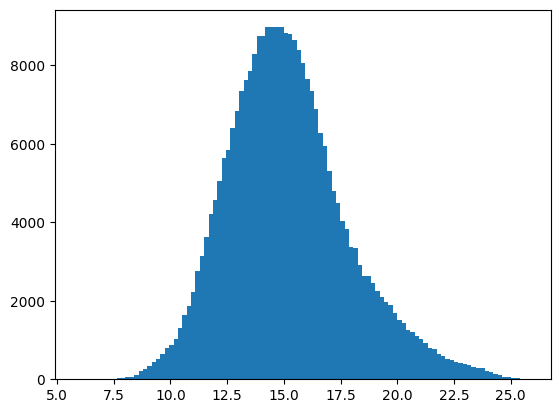

In [38]:
h, b = torch.histogram(clip_logit)
b = np.convolve(b,[0.5,0.5])[1:-1]
plt.bar(b,h)

In [46]:
b[61]

18.05391216278076

In [47]:
h[0:61].sum()/h.sum()

tensor(0.8611)